<p>
Homework: https://work.caltech.edu/homework/hw4.pdf
<p>
Answers:
1. b
2. d
3. b
4. e
5. b
6. a
7. b
8. c
9. b
10. d

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [5]:
# Generalization bound (VC dimension)
# δ = 4 * (mH(2N)) * e ^ (- epsilon ^ 2 * N / 8)
# epsilon = sqrt((8 * logn(4 * (mH(2N)) / δ)) / N) = Omega(N, H, δ)
# Replacing growth function with the simple approximation bound: N ^ dVC
# δ = 4 * 2N ^ dVC * e ^ (- epsilon ^ 2 * N / 8)
# d_VC * ln(2N) - epsilon ^ 2 * N / 8 - ln(δ/4) = 0
# epsilon = sqrt((8 * logn(4 * N ^ dVC / δ)) / N) = Omega(N, H, δ)

In [305]:
# dVC = 10
# δ = 0.05
# epsilon = 0.05

def vc_bound_eqn(N, delta=0.05, epsilon=0.05, d_VC = 10):
    return d_VC * np.log(2*N) - (epsilon ** 2 * N / 8.0) - np.log(delta/4)
# 0.05 = 4 * N ** 10 * e ** (- 0.05 ** 2 * N / 8) 
for N in [400000, 420000, 440000, 460000, 480000]:
    print "N: {}, value: {}".format(N, vc_bound_eqn(N))

N: 400000, value: 15.3056967012
N: 420000, value: 9.54359834287
N: 440000, value: 3.75879849922
N: 460000, value: -2.04668387507
N: 480000, value: -7.87108773089


<h4>Answer 1:</h4>
The value that is closest to 0 happens when N is 460000, so the answer to question 1 is <b>d</b>

In [7]:
# There are different generalization bounds. They are coded up in functions below
def original_VC_bound(N, d_VC = 50, delta = 0.05):
    return np.sqrt((8.0 * d_VC / N) * np.log(4.0 * N / delta))
def original_VC_bound_2(N, d_VC = 50, delta = 0.05):
    return np.sqrt((8.0 * d_VC / N) * np.log(8.0 * N / delta))
def rademacher_penalty_bound(N, d_VC = 50, delta = 0.05):
    return np.sqrt((2.0 * (d_VC + 1) / N) * np.log(2 * N)) + np.sqrt((2/N) * np.log(1/delta)) + (1/N)
def parrondo_and_van_den_broek(N, d_VC = 50, delta = 0.05):
    return (1.0 / N) + np.sqrt((1.0 / N**2) + ((d_VC * np.log(6.0 * N / delta)) / N))
def parrondo_and_van_den_broek_2(N, d_VC = 50, delta = 0.05):
    return (1.0 / N) + np.sqrt((1.0 / N**2) + ((d_VC * np.log(12.0 * N / delta)) / N))
def devroye(N, d_VC = 50, delta = 0.05):
    return (1.0 / N) - (2.0 / N**2) + np.sqrt((N - 2)**2/N**4 + d_VC * np.log(4.0 * N / delta) / (2 * (N - 2)))
def devroye_2(N, d_VC = 50, delta = 0.05):
    return (1.0 / N) - (2.0 / N**2) + np.sqrt((N - 2)**2/N**4 + d_VC * 2.0 * np.log(4.0 * N / delta) / (2 * (N - 2)))

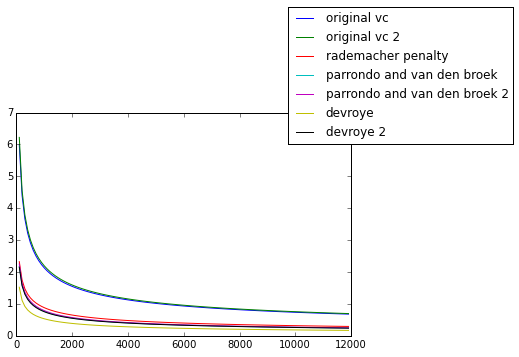

In [8]:
N = np.arange(0, 12000, 100);
plt.plot(N, original_VC_bound(N), label='original vc')
plt.plot(N, original_VC_bound_2(N), label='original vc 2')
plt.plot(N, rademacher_penalty_bound(N), label='rademacher penalty')
plt.plot(N, parrondo_and_van_den_broek(N), label='parrondo and van den broek')
plt.plot(N, parrondo_and_van_den_broek_2(N), label='parrondo and van den broek 2')
plt.plot(N, devroye(N), label='devroye')
plt.plot(N, devroye_2(N), label='devroye 2')
plt.legend(bbox_to_anchor=(1.5, 1.5))
plt.show()

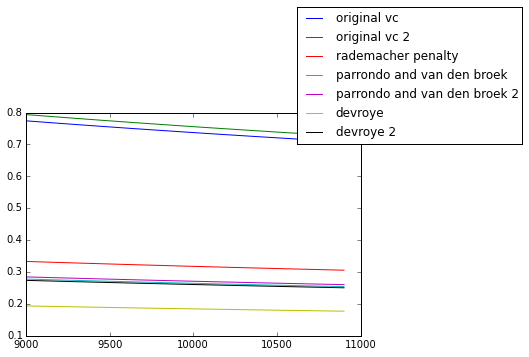

In [9]:
N = np.arange(9000, 11000, 100);
plt.plot(N, original_VC_bound(N), label='original vc')
plt.plot(N, original_VC_bound_2(N), label='original vc 2')
plt.plot(N, rademacher_penalty_bound(N), label='rademacher penalty')
plt.plot(N, parrondo_and_van_den_broek(N), label='parrondo and van den broek')
plt.plot(N, parrondo_and_van_den_broek_2(N), label='parrondo and van den broek 2')
plt.plot(N, devroye(N), label='devroye')
plt.plot(N, devroye_2(N), label='devroye 2')
plt.legend(bbox_to_anchor=(1.5, 1.5))
plt.show()

<h4>Answer 2:</h4>
So for N=10000, devroye bound is smallest so answer to question 2 is <b>d.</b>

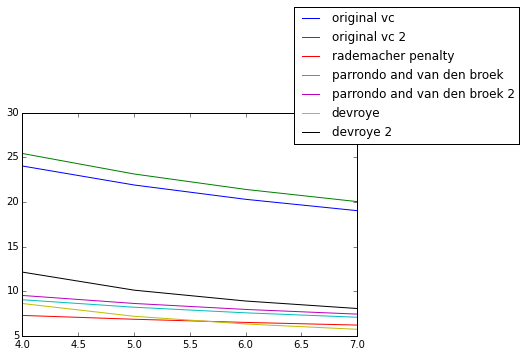

In [307]:
N = np.arange(4, 8, 1);
plt.plot(N, original_VC_bound(N), label='original vc')
plt.plot(N, original_VC_bound_2(N), label='original vc 2')
plt.plot(N, rademacher_penalty_bound(N), label='rademacher penalty')
plt.plot(N, parrondo_and_van_den_broek(N), label='parrondo and van den broek')
plt.plot(N, parrondo_and_van_den_broek_2(N), label='parrondo and van den broek 2')
plt.plot(N, devroye(N), label='devroye')
plt.plot(N, devroye_2(N), label='devroye 2')
plt.legend(bbox_to_anchor=(1.5, 1.5))
plt.show()

<h4>Answer 3:</h4>
So for N=5, rademacher penalty bound is smallest so answer to question 3 is <b>b.</b>

In [11]:
X = np.random.uniform(low=-1.0, high=1.0, size=2)
X = X.T
X

array([-0.37914011, -0.8011893 ])

In [12]:
def f(x):
    return np.sin(np.pi * x)
f(X)

array([-0.92877863, -0.58475843])

In [13]:
x_min = -1
x_max = 1
y_min = x_min
y_max = x_max

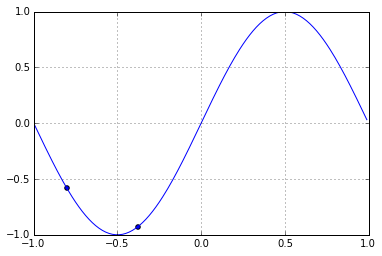

In [14]:
plt.grid(True)
t = np.arange(-1.0, 1.0, .01)
plt.plot(t, np.sin(np.pi * t))
plt.axis([x_min, x_max, y_min, y_max])
plt.scatter(X, f(X))

In [15]:
from numpy.linalg import inv
import collections
def linear_regression(X, y):
    X_T_X = np.dot(X.T, X)
    inverse = inv(X_T_X) if isinstance(X_T_X, collections.Sequence) else 1.0/X_T_X
    X_dagger = np.dot(inverse, X.T)
    weights = np.dot(X_dagger, y)
    return weights

In [16]:
linear_regression(X, f(X))

1.0445336308892212

In [45]:
num_experiments = 1000
a = []
for i in range(num_experiments):
    X_exp = np.random.uniform(low=-1.0, high=1.0, size=2)
    X_exp = X_exp.T
    y_exp = np.sin(np.pi * X_exp)
    a.append(linear_regression(X_exp, y_exp))
a_hat = np.mean(a)

In [46]:
print "a_hat is {} after {} experiments (or {} after rounding)".format(a_hat, num_experiments, np.round(a_hat, 2))

a_hat is 1.44058348681 after 1000 experiments (or 1.44 after rounding)


<h4>Answer 4:</h4>
$$\hat{a} = 1.43$$
So answer to question 4 is <b>e</b> or "None of the above".

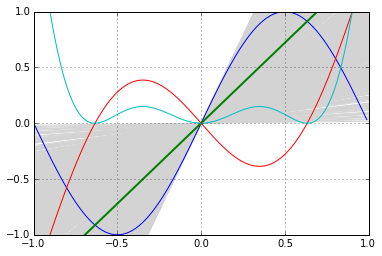

In [49]:
plt.axis([x_min, x_max, y_min, y_max])
for ai in a:
    plt.plot(p, ai * p, color='lightgrey')
plt.grid(True)
t = np.arange(-1.0, 1.0, .01)
plt.plot(t, np.sin(np.pi * t))
p = np.array([-1, 1])
plt.plot(p, a_hat * p, lw=2)
plt.plot(t, a_hat * t - np.sin(np.pi * t))
plt.plot(t, (a_hat * t - np.sin(np.pi * t))**2)

In [80]:
x = np.arange(-1.0, 1.0, .01)
bias = np.mean((a_hat * x - np.sin(np.pi * x))**2)
bias = np.round(bias, 2)
print "Bias is {}".format(bias)

Bias is 0.27


<h4>Answer 5:</h4>
The bias is 0.27. So answer to question 5 is <b>b</b> or 0.3.

In [81]:
variance = np.mean((np.outer(np.array(a), x) - a_hat * x)**2)
variance = np.round(variance, 2)
print "Variance is {}".format(variance)

Variance is 0.24


<h4>Answer 6:</h4>
The variance is 0.24. So answer to question 6 is <b>a</b> or 0.2.

In [82]:
print "Also, the expected error is bias + variance = {} + {} = {}".format(bias, variance, bias + variance)

Also, the expected error is bias + variance = 0.27 + 0.24 = 0.51


In [297]:
def expected_error(transformation):
    num_experiments = 10000
    step = 0.01
    weights = []
    for i in range(num_experiments):
        X_exp = np.random.uniform(low=-1.0, high=1.0, size=2)
        y_exp = np.sin(np.pi * X_exp)
        weights.append(linear_regression(transformation(X_exp), y_exp))
    weights_hat = np.mean(weights, axis=0)
    x = np.arange(-1.0, 1.0, step)
    bias = np.mean((np.dot(transformation(x), weights_hat) - np.sin(np.pi * x))**2)
    if len(np.shape(weights)) == 1:
        A = np.outer(np.array(weights), transformation(x))
    else:
        A = np.dot(np.array(weights), transformation(x).transpose())
    B = np.dot(transformation(x), weights_hat)
    variance = np.mean((A - B)**2)
    expected_error = bias + variance
    
    plt.axis([x_min, x_max, y_min, y_max])
    for w in weights:
        plt.plot(x, np.dot(transformation(x), w), color='lightgrey')
    plt.grid(True)
    plt.plot(x, np.sin(np.pi * x), color='blue')
    if len(np.shape(weights)) == 1:
        plt.plot(transformation(x), np.sin(np.pi * x), color='black')
    else:
        print np.shape(transformation(x))
        print np.shape(transformation(x)[:,1])
        plt.plot(transformation(x)[:,1], np.sin(np.pi * x), color='black')
    p = np.array([-1, 1])
    plt.plot(x, np.dot(transformation(x), weights_hat), lw=2, color='green')
    plt.plot(x, (np.dot(transformation(x), weights_hat) - np.sin(np.pi * x))**2, color='red')

    print "weights:{}".format(np.round(weights_hat, 2))
    print "Bias: {}, Variance: {}, E(error): {}".format(np.round(bias, 2), np.round(variance, 2), np.round(expected_error, 2))

weights:-0.01
Bias: 0.5, Variance: 0.25, E(error): 0.75


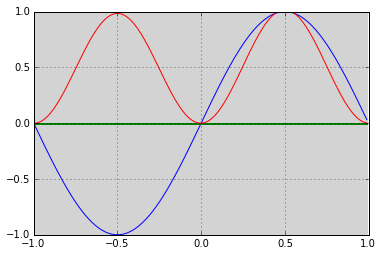

In [298]:
def only_threshold(x):
    return np.ones(np.size(x))
expected_error(only_threshold)

weights:1.42
Bias: 0.27, Variance: 0.23, E(error): 0.5


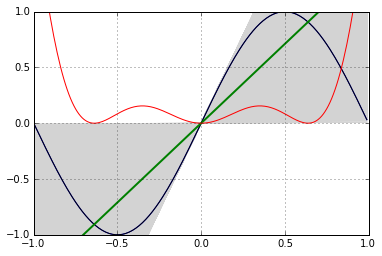

In [299]:
def identity(x):
    return x
expected_error(identity)

(200, 2)
(200,)
weights:[ 0.98  2.21]
Bias: 1.67, Variance: 17993.82, E(error): 17995.49


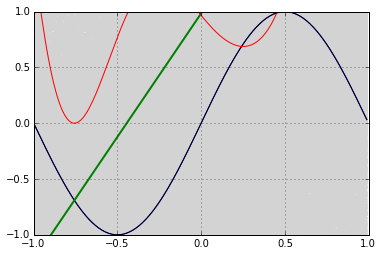

In [300]:
def with_threshold(x):
    return np.array([np.ones(np.size(x)), x]).transpose()
expected_error(with_threshold)

weights:0.06
Bias: 0.5, Variance: 27.2, E(error): 27.7


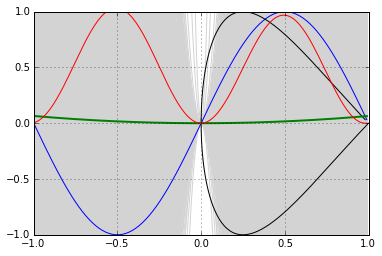

In [301]:
def square(x):
    return x**2
expected_error(square)

(200, 2)
(200,)
weights:[-0.01 -0.19]
Bias: 0.51, Variance: 158.07, E(error): 158.58


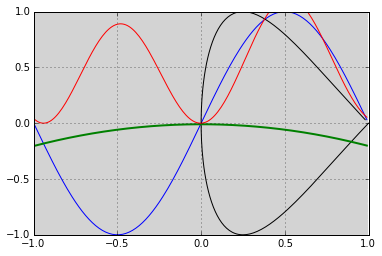

In [302]:
def square_with_threshold(x):
    return np.array([np.ones(np.size(x)), x**2]).transpose()
expected_error(square_with_threshold)

<h4>Answer 7:</h4>
The hypothesis with the lowest expected error is identity or :
$$h(x) = ax$$
So answer to question 7 is <b>b</b>.

<h4>Answer 8:</h4>
<br>For q=1, the series looks like breakpoint of k=2 which means VC dimension is 1. 
<br>For q=2, the series looks like breakpoint of k=3 which means VC dimension is 2.
<br>For q=3, the series looks like breakpoint of k=4 which means VC dimension is 3.
<p>Seems like it would be fair to say that q is the vc dimension.
But I don't have either a good proof or a good intuition about this.
I'll say the answer to question 8 is <b>c</b>.

<h4>Answer 9:</h4>
<p>If a hypothesis is in the intersection, it means that it is in all sets, so even in the one with the lowest vc dimension. If it could shatter a bigger set, then the vc dimension of the set with the smalled vc dimension would be higher, but that would be a contradiction. So the max is the min vc dimension of all the sets. And min is 0 if the intersection is empty.
<p>I'll say the answer to question 9 is <b>b</b>.

<h4>Answer 10:</h4>
<p>I'll say the answer to question 10 is either d or e. THe upper bound seems loose to me so I will choose the smaller one. So the answer is <b>d</b>.

<p>
Homework: https://work.caltech.edu/homework/hw4.pdf
<p>
Answers:
1. b --> d
2. d
3. b --> c
4. e
5. b
6. a
7. b
8. c
9. b
10. d --> e

<p>
Answer key: https://work.caltech.edu/homework/hw4_sol.pdf